<a href="https://colab.research.google.com/github/Andrii-Radyhin/Internship-Description-Task-2/blob/main/Geometrical_shapes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# As a function 
Below step by step with visualizations.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


params = [
    {'blur':((11,11), 0), 'canny': (30,94,3),
     'dilated': ((1,1), 2), 'area_coef': 0.07},
    {'blur':((11,11), 0), 'canny': (30,105,3),
     'dilated': ((1,1), 0), 'area_coef': 0.009},
    {'blur':((11,11), 0), 'canny': (37,90,3),
     'dilated': ((1,1), 2), 'area_coef': 0.02},
    {'blur':((11,11), 0),'canny': (30,85,3),
     'dilated': ((1,1), 2), 'area_coef': 0.008}
]

def bricks_counter(img_path, parameters):
  image = cv2.imread(img_path)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, parameters['blur'][0], parameters['blur'][1])

  canny = cv2.Canny(blur, parameters['canny'][0],
                    parameters['canny'][1], parameters['canny'][2])
  
  dilated = cv2.dilate(canny, parameters['dilated'][0],
                       iterations=parameters['dilated'][1])

  (cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
  area=[]
  for contour in cnt:
    area.append(cv2.contourArea(contour))

  max_avg = sum(area)/len(area)
  parts = 0
  for a in area:
    if a < parameters['area_coef']*max_avg:
      parts += 1

  print(f"Total bricks in the image: {len(cnt)}, Parts: {parts}, Full: {len(cnt)-parts}" )
  return cnt, rgb, parts

Total bricks in the image: 54, Parts: 20, Full: 34
Total bricks in the image: 373, Parts: 106, Full: 267
Total bricks in the image: 84, Parts: 20, Full: 64
Total bricks in the image: 95, Parts: 25, Full: 70


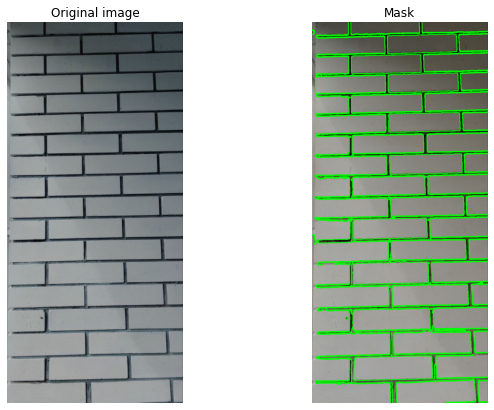

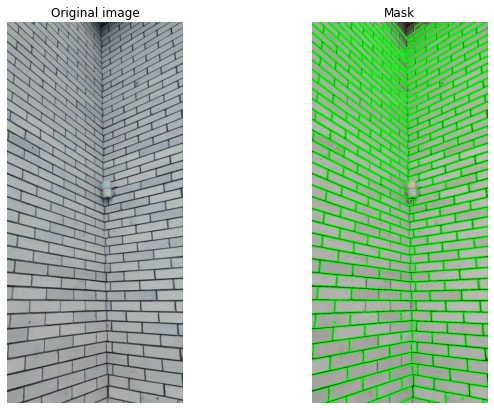

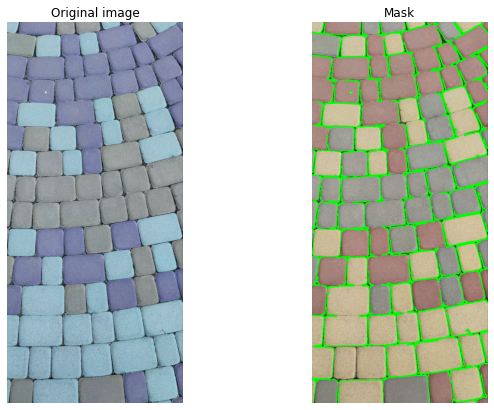

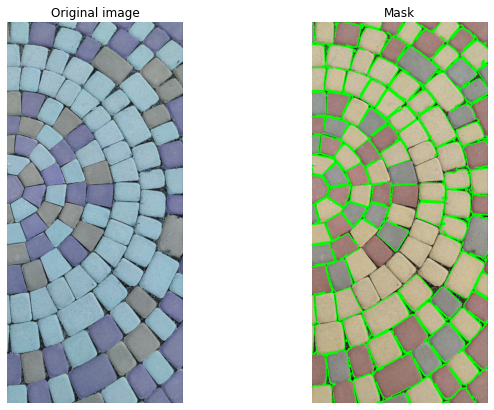

In [ ]:
import os
img_dir = '/content/imgs'
pathes = sorted(os.listdir('/content/imgs'))

contours = []
rgbs = []
parts=[]
for param, path in zip(params, pathes):
  img_path = os.path.join(img_dir, path)
  contour, rgb, part = bricks_counter(img_path, param)
  contours.append(contour); rgbs.append(rgb); parts.append(part)

rows = 1
columns = 2

for cnt, rgb, path in zip(contours, rgbs, pathes):
    fig = plt.figure(figsize=(10, 7))
    fig.add_subplot(rows, columns, 1)
    img_path = os.path.join(img_dir, path)
    img = cv2.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Original image")
    
    fig.add_subplot(rows, columns, 2)
    cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
    plt.imshow(rgb)
    plt.axis('off')
    plt.title("Mask")

## img 1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

True

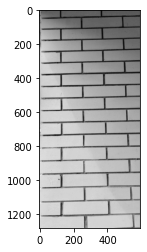

In [2]:
image = cv2.imread('/content/img1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

True

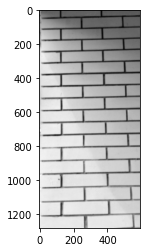

In [3]:
blur = cv2.GaussianBlur(gray, (11, 11), 0)
plt.imshow(blur, cmap='gray')

True

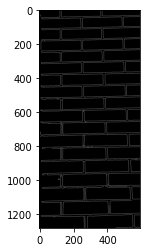

In [4]:
canny = cv2.Canny(blur, 30,94, 3)
plt.imshow(canny, cmap='gray')
cv2.imwrite('canny.jpg', canny)

True

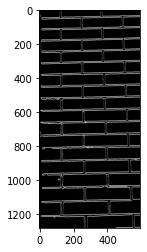

In [5]:
dilated = cv2.dilate(canny, (1, 1), iterations=2)
plt.imshow(dilated, cmap='gray')
cv2.imwrite('dilated.jpg', dilated)

True

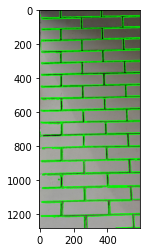

In [6]:
(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
 
plt.imshow(rgb)
cv2.imwrite('rgb_test1.jpg',rgb)

In [ ]:
print("bricks in the image : ", len(cnt))

bricks in the image :  54


In [ ]:
area=[]
for contour in cnt:
    area.append(cv2.contourArea(contour))

copy_area = area
max_five = []
for i in range(5):
  max_five.append(max(area))
  copy_area.remove(max(area))
  
max_avg = sum(max_five)/5
parts = 0
for a in area:
  if a < 0.0095*max_avg:
    parts += 1

print(f"Total bricks in the image: {len(cnt)}, Parts: {parts}, Full: {len(cnt)-parts}" )

Total bricks in the image: 54, Parts: 20, Full: 34


In [ ]:
area=[]
for contour in cnt:
    area.append(cv2.contourArea(contour))

max_avg = sum(area)/len(area)
parts = 0
for a in area:
  if a < 0.07*max_avg:
    parts += 1

print(f"Total bricks in the image: {len(cnt)}, Parts: {parts}, Full: {len(cnt)-parts}" )

Total bricks in the image: 54, Parts: 20, Full: 34


## img 2

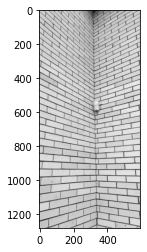

In [ ]:
image = cv2.imread('/content/img2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

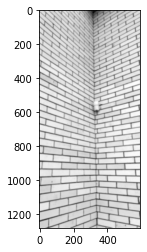

In [ ]:
blur = cv2.GaussianBlur(gray, (11, 11), 0)
plt.imshow(blur, cmap='gray')

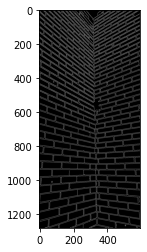

In [ ]:
canny = cv2.Canny(blur, 30, 105, 3)
plt.imshow(canny, cmap='gray')

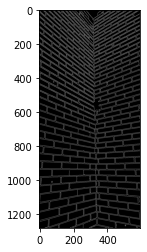

In [ ]:
dilated = cv2.dilate(canny, (1, 1), iterations=0)
plt.imshow(dilated, cmap='gray')

True

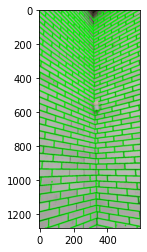

In [ ]:
(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
 
plt.imshow(rgb)
cv2.imwrite('/content/sample_data/rgb2.jpg',rgb)

In [ ]:
print("bricks in the image : ", len(cnt)) #true: 371

bricks in the image :  373


In [ ]:
area=[]
for contour in cnt:
    area.append(cv2.contourArea(contour))

max_avg = sum(area)/len(area)
parts = 0
for a in area:
  if a < 0.009*max_avg:
    parts += 1

print(f"Total bricks in the image: {len(cnt)}, Parts: {parts}, Full: {len(cnt)-parts}" )

Total bricks in the image: 373, Parts: 106, Full: 267


# img3

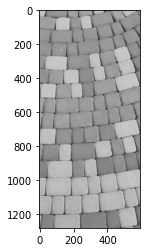

In [ ]:
image = cv2.imread('/content/img3.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

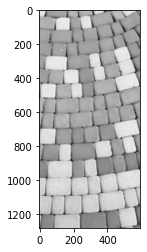

In [ ]:
blur = cv2.GaussianBlur(gray, (11, 11), 0)
plt.imshow(blur, cmap='gray')

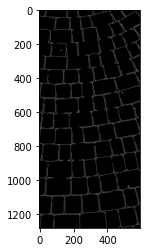

In [ ]:
canny = cv2.Canny(blur, 37, 90, 3)
plt.imshow(canny, cmap='gray')

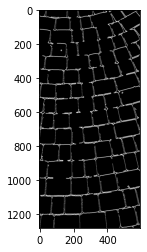

In [ ]:
dilated = cv2.dilate(canny, (1, 1), iterations=2)
plt.imshow(dilated, cmap='gray')

True

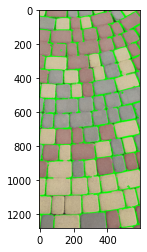

In [ ]:
(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
 
plt.imshow(rgb)
cv2.imwrite('/content/sample_data/rgb3.jpg',rgb)

In [ ]:
print("bricks in the image : ", len(cnt)) 

bricks in the image :  84


In [ ]:
area=[]
for contour in cnt:
    area.append(cv2.contourArea(contour))

max_avg = sum(area)/len(area)
parts = 0
for a in area:
  if a < 0.02*max_avg:
    parts += 1

print(f"Total bricks in the image: {len(cnt)}, Parts: {parts}, Full: {len(cnt)-parts}" )

Total bricks in the image: 84, Parts: 20, Full: 64


# img4

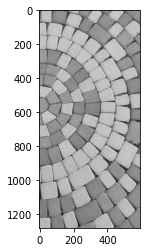

In [ ]:
image = cv2.imread('/content/img4.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

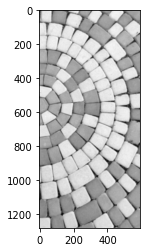

In [ ]:
blur = cv2.GaussianBlur(gray, (11, 11), 0)
plt.imshow(blur, cmap='gray')

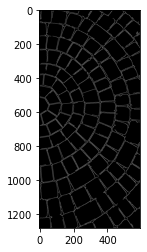

In [ ]:
canny = cv2.Canny(blur, 37, 85, 3)
plt.imshow(canny, cmap='gray')

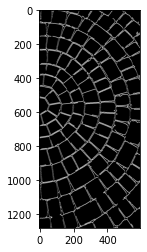

In [ ]:
dilated = cv2.dilate(canny, (1, 1), iterations=2)
plt.imshow(dilated, cmap='gray')

True

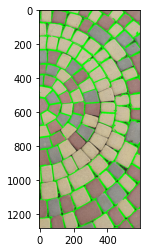

In [ ]:
(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
 
plt.imshow(rgb)
cv2.imwrite('/content/sample_data/rgb4.jpg',rgb)

In [ ]:
print("bricks in the image : ", len(cnt)) 

bricks in the image :  102


In [ ]:
area=[]
for contour in cnt:
    area.append(cv2.contourArea(contour))

max_avg = sum(area)/len(area)
parts = 0
for a in area:
  if a < 0.008*max_avg:
    parts += 1

print(f"Total bricks in the image: {len(cnt)}, Parts: {parts}, Full: {len(cnt)-parts}" )

Total bricks in the image: 95, Parts: 25, Full: 70
